# Case Study 1: Random Forest

Insurance Premium prediction

Develop a Random Forest Regressor model based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make 
decision on charging the premium.

Dataset: insurance.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking for missing values

In [3]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Convert categorical variables into numerical variables

In [4]:
insurance_df = pd.get_dummies(insurance_df, drop_first=True)

### Spliting the dataset into features(X) and target variable(Y)

In [5]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

### Spliting the data into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Import the Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

### Create the model and fit it to the training data

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Make predictions on the test data

In [9]:
y_pred = rf.predict(X_test)

### Calculate the MAE, MSE,RMSE

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MAE:  2550.0784706115096
MSE:  20942520.922619622
RMSE:  4576.299916157115


### Ploting feature importance

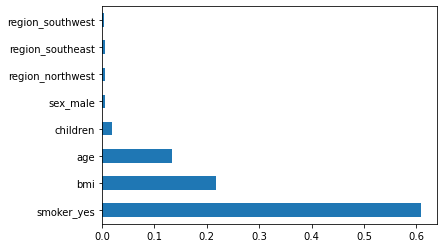

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()